## Polytope Extremes-DT Feature Extraction Country cut out example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.


Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [1]:
%%capture cap
%run ../desp-authentication.py

Exception: Invalid username or password.

This will generate a token that can then be used by earthkit and polytope.

In [2]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install cf-units         (Optional for unit conversion in maps)

In [3]:
import earthkit.data
import earthkit.plots
import earthkit.geo.cartography
from polytope.api import Client

In [4]:
countries = ["France", "Italy", "Spain"] # List of countries
shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e7)

In [5]:
client = Client(
    address="polytope.lumi.apps.dte.destination-earth.eu")

request = {
    "dataset": "extremes-dt",
    "class": "d1",
    "stream": "oper",
    "type": "fc",
    "date": "-14",
    "time": "0000",
    "levtype": "sfc",
    "expver": "0001",
    "param": "165/167",
    "step": "1",
    "feature": {
        "type": "polygon",
        "shape": shapes,
    },
}

file = client.retrieve("destination-earth", request, "data/extremes-dt-earthkit-example-fe-country.grib") 


2025-07-19 15:31:35 - INFO - Key read from /Users/maes/.polytopeapirc
2025-07-19 15:31:35 - INFO - Sending request...
{'request': 'class: d1\n'
            'dataset: extremes-dt\n'
            "date: '-14'\n"
            "expver: '0001'\n"
            'feature:\n'
            '  shape:\n'
            '  - - - 37.44404551853776\n'
            '      - 15.160242954171736\n'
            '    - - 37.13421946873183\n'
            '      - 15.309897902089006\n'
            '    - - 36.6199872909954\n'
            '      - 15.099988234119422\n'
            '    - - 36.996630967754726\n'
            '      - 14.335228712631988\n'
            '    - - 37.10453135838016\n'
            '      - 13.826732618879959\n'
            '    - - 37.61294993748375\n'
            '      - 12.431003859108756\n'
            '    - - 38.12638113051966\n'
            '      - 12.570943637755136\n'
            '    - - 38.03496552179533\n'
            '      - 13.741156447004613\n'
            '    - - 38.143873

In [6]:
data = earthkit.data.from_source("file", "data/extremes-dt-earthkit-example-fe-country.grib") 

In [7]:
data._json()

{'type': 'CoverageCollection',
 'domainType': 'MultiPoint',
 'coverages': [{'mars:metadata': {'class': 'd1',
    'dataset': 'extremes-dt',
    'Forecast date': '2025-07-05T00:00:00Z',
    'expver': '0001',
    'levtype': 'sfc',
    'step': 1,
    'stream': 'oper',
    'type': 'fc',
    'number': 0},
   'type': 'Coverage',
   'domain': {'type': 'Domain',
    'axes': {'t': {'values': ['2025-07-05T00:00:00Z']},
     'composite': {'dataType': 'tuple',
      'coordinates': ['x', 'y', 'z'],
      'values': [[35.978908111431, 354.45165476963, 0],
       [35.978908111431, 354.510058403634, 0],
       [35.978908111431, 354.568462037638, 0],
       [35.978908111431, 354.626865671642, 0],
       [36.014060928282, 354.272727272727, 0],
       [36.014060928282, 354.331168831169, 0],
       [36.014060928282, 354.38961038961, 0],
       [36.014060928282, 354.448051948052, 0],
       [36.014060928282, 354.506493506493, 0],
       [36.014060928282, 354.564935064935, 0],
       [36.014060928282, 354.623

In [8]:
# Convert data to xarray
da = data.to_xarray()

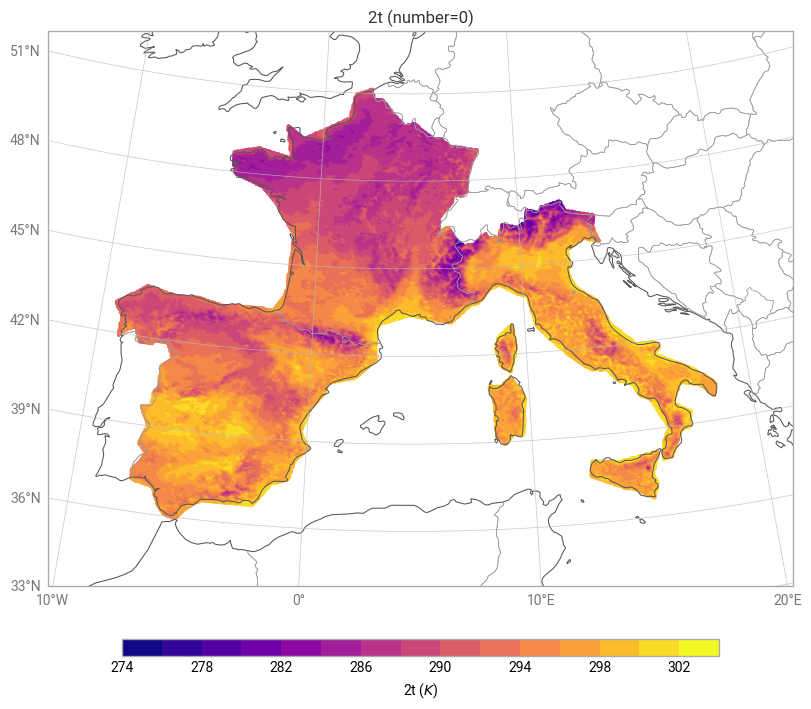

In [12]:
chart = earthkit.plots.Map(domain=countries)
chart.point_cloud(
    da['2t'],
    x="longitude",
    y="latitude",
    auto_style=True
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()